In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings('ignore')

#Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To scale our data
from sklearn.preprocessing import StandardScaler

#To split the data into training and testing set
from sklearn.model_selection import train_test_split

#Classification model- Support Vector Machine
from sklearn.svm import SVC

#Classification model performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [3]:
df=pd.read_csv(r'C:\Users\VISHESH S\Downloads\Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploratory Data Analysis

### Heatmap to check null/missing values

Text(0.5, 1.0, 'type of area')

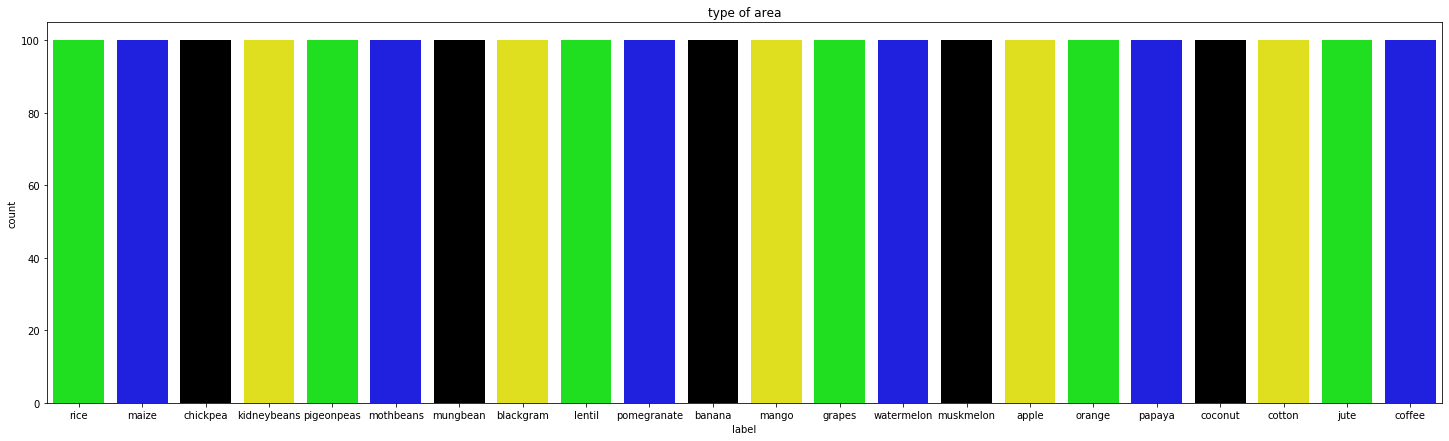

In [5]:
f=plt.subplots(figsize=(25,7))
color_types=['#00FF00','#0000FF','#000000','#FFFF00']
sns.countplot(x="label",palette=color_types,data=df).set_title('type of area')

Text(0.5, 1.0, 'type of area')

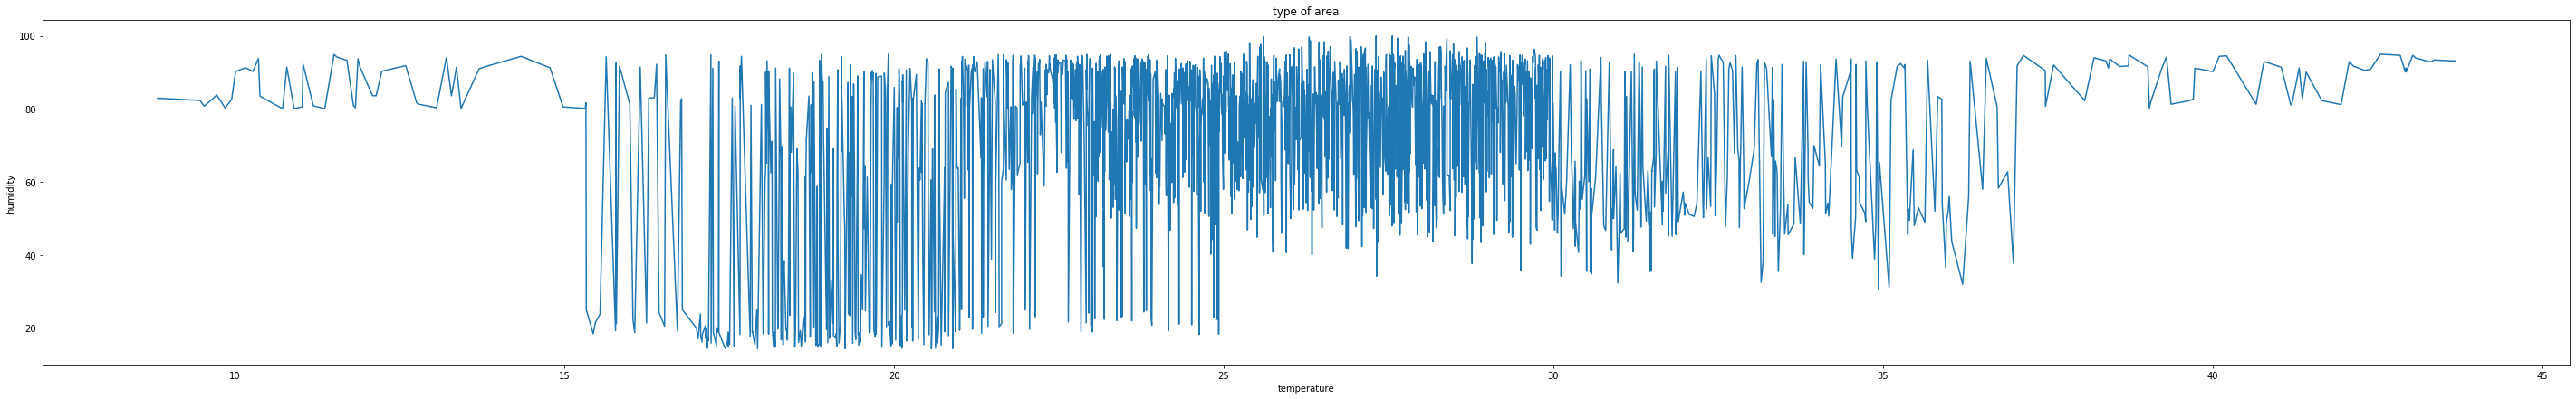

In [6]:
f=plt.subplots(figsize=(50,7))
color_types=['#00FF00','#0000FF','#000000','#FFFF00']
sns.lineplot(x="temperature",palette=color_types,data=df,y="humidity").set_title('type of area')

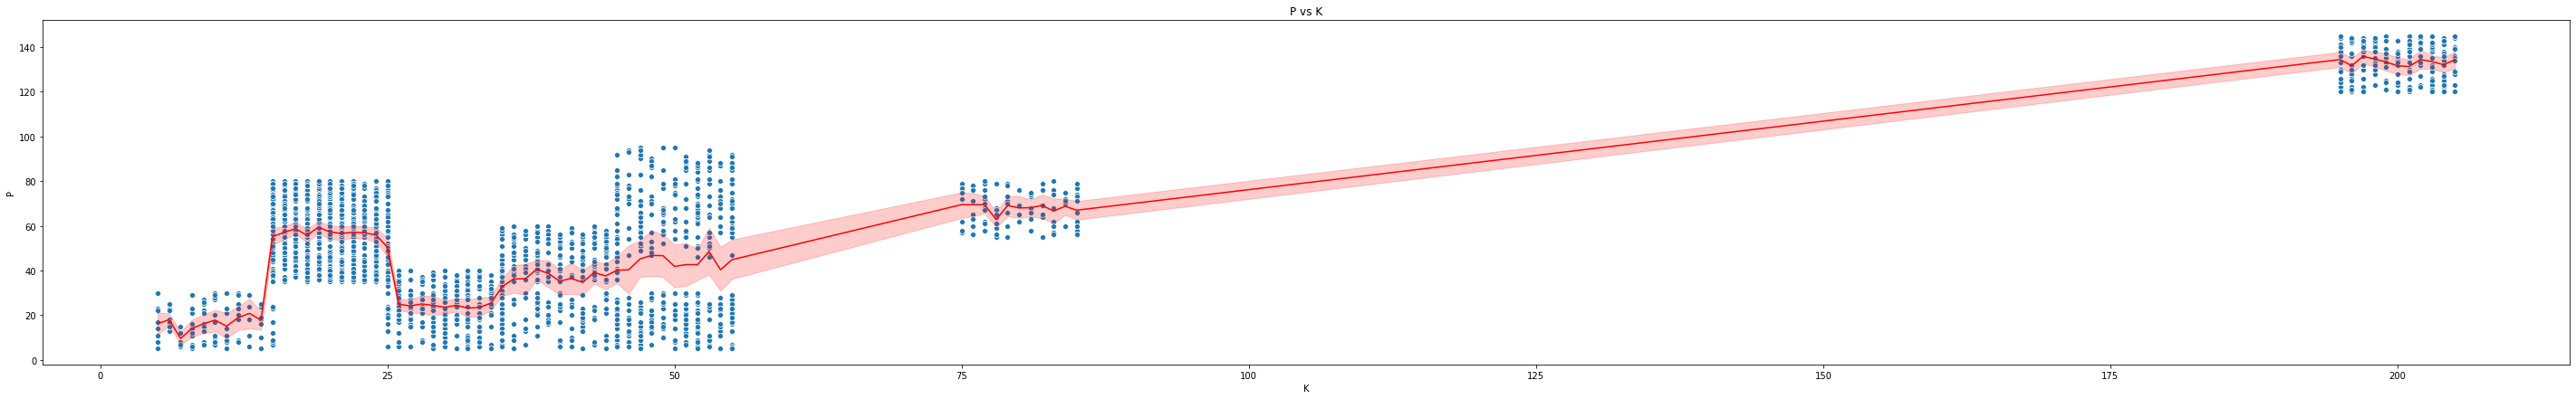

In [7]:
f=plt.subplots(figsize=(50,7))
color_types=['#00FF00','#0000FF','#000000','#FFFF00']
sns.scatterplot(x="K",palette=color_types,data=df,y="P").set_title('P vs K')
sns.lineplot(x="K",color="red",data=df,y="P")

<h4> <u>Let's have a closer look at the distribution of temperature and ph.</u><br><br>
    
It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!</h4>

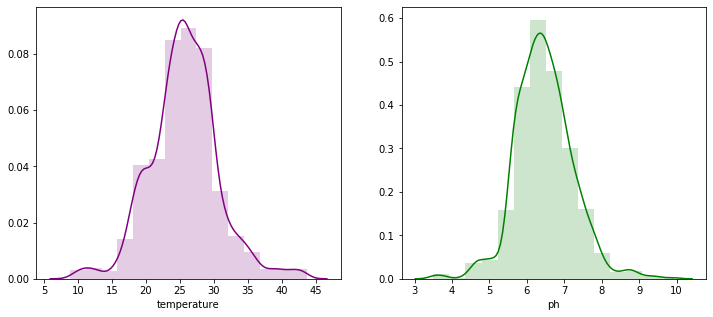

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

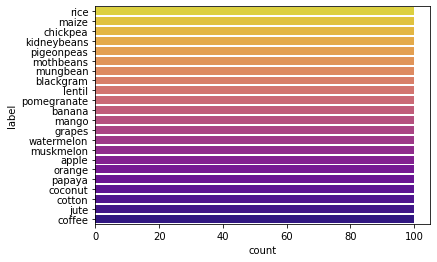

In [9]:
sns.countplot(y='label',data=df, palette="plasma_r")

<h4> A very important plot to visualize the diagonal distribution between two features for all the combinations! It is great to visualize how classes differ from each other in a particular space.

#### During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

#### Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season. 

- <b> Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
- <b> Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

<h4>Let's try to plot a specfic case of pairplot between `humidity` and `K` (potassium levels in the soil.)</h4>

#### `sns.jointplot()` can be used for bivariate analysis to plot between humidity and K levels based on Label type. It further generates frequency distribution of classes with respect to features

#### We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

#### Another interesting analysis where Phosphorous levels are quite differentiable when it rains heavily (above 150 mm).

#### Further analyzing phosphorous levels.

When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

# DATA PRE-PROCESSING

### Let's make the data ready for machine learning model

In [10]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

In [11]:
c

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: category
Categories (22, object): [apple, banana, blackgram, chickpea, ..., pigeonpeas, pomegranate, rice, watermelon]

In [12]:
targets

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [13]:
c.cat.codes

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Length: 2200, dtype: int8

In [14]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: target, Length: 2200, dtype: int8

In [15]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [16]:
ss=StandardScaler()
ss.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
x=ss.transform(X)

**Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.**

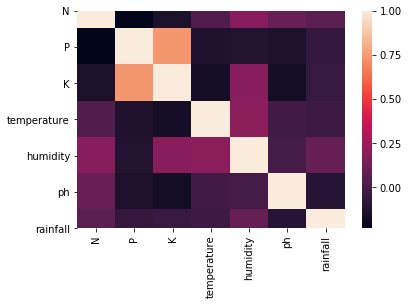

In [18]:
sns.heatmap(X.corr())

# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

As we saw earlier, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

# MODEL SELECTION

## KNN Classifier for Crop prediction. 
<hr>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

### Confusion Matrix

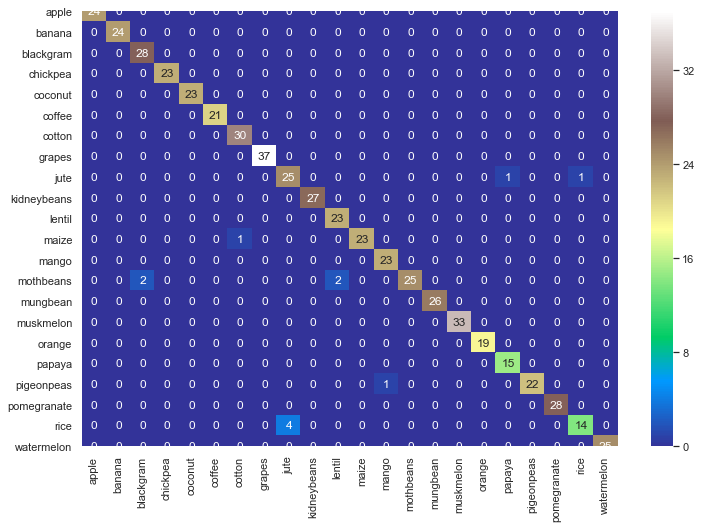

In [21]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

### Let's try different values of n_neighbors to fine tune and get better results

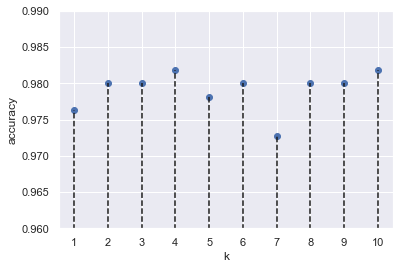

In [22]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

## Classification using Support Vector Classifer (SVC)
<hr>

In [23]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9745454545454545
Rbf Kernel Accuracy:  0.7745454545454545
Poly Kernel Accuracy:  0.15272727272727274


### Let's try to increase SVC Linear model accuracy by parameter tuning.

**GridSearchCV can help us find the best parameters.**

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
print(model.best_score_ )
print(model.best_params_ )

0.9866666666666667
{'C': 1.0, 'gamma': 0.001}


**POINTS TO BE HIGHLIGHTED**
1. *Interestingly liner kernel also gives satisfactory results but fine tuning increases the computation and might be inefficient in some cases*
2. *The accuracy can be increased in poly kernel by tweaking parameters but might lead to intensive overfitting.*
3. *RBF has better result than linear kernel.*
4. *Poly kernel so far wins by a small margin.*

## Classifying using decision tree
<hr>

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9872727272727273

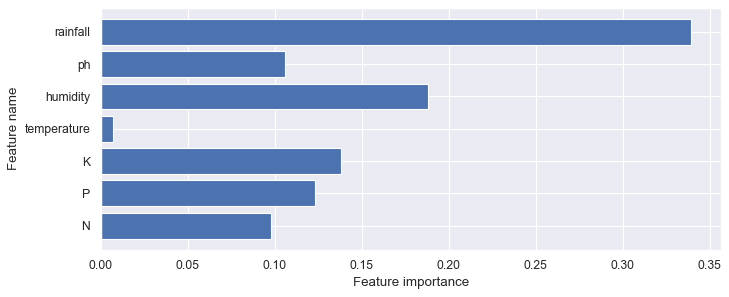

In [27]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

## Classification using Random Forest.
<hr>

In [28]:
'''
max depth and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting. max_depth=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.
'''

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


## Classification using Gradient Boosting
<hr>

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,y_test)))

Gradient Boosting accuracy : 0.9945454545454545


In [30]:
#Classification model- Support Vector Machine
#To avoid unnecessary warnings messages
import warnings
warnings.filterwarnings('ignore')

#Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To scale our data
from sklearn.preprocessing import StandardScaler

#To split the data into training and testing set
from sklearn.model_selection import train_test_split

#Classification model- Support Vector Machine
from sklearn.svm import SVC

#Classification model performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score


In [31]:
model=SVC(kernel='linear',C=10.0)

model.fit(X_train,y_train)
ypred=model.predict(X_test) 
ac=accuracy_score(y_test,ypred) 
cm=confusion_matrix(y_test,ypred) 
cr=classification_report(y_test,ypred) 
train=model.score(X_train,y_train) 
test=model.score(X_test,y_test)
    
print(f'{model} Accuracy:{ac}\n{cm}\n{cr}\nTraining Accuracy: {train}\nTesting Accuracy: {test}')


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) Accuracy:0.9890909090909091
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  

In [32]:
ypred

array([ 7, 15,  9, 15,  8, 21,  9, 16,  8, 18, 19,  8,  5, 12, 13,  1,  1,
        4,  1, 16, 10,  0, 19, 17, 15,  1,  7,  4,  6, 21, 11, 11, 15,  0,
       13,  6, 12,  2, 14, 16, 18,  7, 16, 17,  4, 19, 17,  5,  3,  8,  3,
       11, 10, 19,  5, 14, 21, 21,  6, 12,  2, 14, 19,  1,  5, 15,  3,  7,
        0,  8,  7, 12, 16, 11, 20, 21, 21, 11,  6, 12,  3,  1,  0, 16,  6,
        2,  6, 12, 13, 19,  8, 18,  7, 21, 14, 14,  9,  6,  7, 14,  1,  8,
       17, 13,  4, 17, 19,  1,  6, 11, 14,  0, 19,  3, 15, 10,  2, 12, 11,
        5,  2,  8, 15,  6,  9,  3,  9, 13, 21, 14, 20, 10, 16,  0,  9,  3,
        6,  4,  3, 14, 10,  2,  5, 18, 15, 19, 17, 10, 13, 21, 14,  4, 10,
       17, 12, 14, 11,  2,  6,  8, 20,  8,  7, 17, 21, 18, 14,  0, 13,  3,
       18,  4, 18, 10,  7,  8, 20, 20,  6,  7,  6,  7,  6, 15,  2, 19,  5,
       17,  7,  1, 21, 16,  1,  0, 15, 14, 10,  7,  8, 20,  4,  2, 15, 14,
       18, 20, 11, 10,  1, 19, 21, 20,  8,  9, 15, 11,  8, 10,  5,  5, 13,
        8,  9,  6, 11, 15

In [33]:
y_test

1276     7
1446    15
335      9
1458    15
2038     8
        ..
1987     6
592     13
470     18
1204     7
872     10
Name: target, Length: 550, dtype: int8

In [34]:
ypred[33]

0

In [35]:
y_test[0:34]

1276     7
1446    15
335      9
1458    15
2038     8
1314    21
389      9
1639    16
2004     8
403     18
979     19
65      20
2105     5
1162    12
572     13
1026     1
1044     1
1846     4
1005     1
1677    16
857     10
1539     0
918     19
1733    17
1417    15
1086     1
1209     7
1862     4
1993     6
1336    21
169     11
120     11
1462    15
1561     0
Name: target, dtype: int8

In [36]:

#To scale our data
from sklearn.preprocessing import StandardScaler

In [37]:
def prediction1(input_data=()):
    #Converting to numpy array
    array_input_data=np.asarray(input_data)
    
    #Reshaping to tell the model we want prediction for 1 instance
    x=array_input_data.reshape(1,-1)
    
    #Standardising data
    standard_x=ss.transform(x)
    
    #Predicting 
    p=model.predict(standard_x)
    
    #Returning the prediction
    if p==9:
        print('no fault')
    else:
        print('fault')
    
    return p

In [38]:
standard_x=ss.transform(x)

In [39]:
p=model.predict(standard_x)

In [40]:
p[2]

9

In [41]:
if p[0]==0:
    print('no fault')
else:
    print('fault')

fault


In [42]:
prediction1([4,110,92,0,0,0,0])

no fault


array([9], dtype=int8)

In [43]:
import webbrowser
from tkinter import Frame,Label,Entry,Button,StringVar,Tk
import numpy as np
root =Tk()
root.configure(bg='#ff0000')

# setting the windows size
root.geometry("800x800")
    
def clearentry():
    entry1.delete(0,'end')
    entry2.delete(0,'end')
    entry3.delete(0,'end')
    entry4.delete(0,'end')
    entry5.delete(0,'end')
    entry6.delete(0,'end')
    entry7.delete(0,'end')
   
    outputlabel.configure(text= 'Output will be shown here')
    
    
def callback(url):
    webbrowser.open_new(url)
    

def take_data():
    d1 = []
    d1.append(entry1.get())
    d1.append(entry2.get())
    d1.append(entry3.get())
    d1.append(entry4.get())
    d1.append(entry5.get())
    d1.append(entry6.get())
    d1.append(entry7.get())
    
    d2 = []
    d2.append(d1)
    
    
    #Standardising data
    standard_x=ss.transform(d2)
    
    #Predicting 
    p=model.predict(standard_x)
    
     
    if p[0]==0:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==1:
        outputlabel.configure(text='BANANA')
        print("BANANA")
    elif p[0]==2:
        outputlabel.configure(text='BLACKGRAM')
        print("BLACKGRAM")
    elif p[0]==3:
        outputlabel.configure(text='CHICKPEA')
        print("CHICKPEA")
    elif p[0]==4:
        outputlabel.configure(text='COCONUT')
        print("COCONUT")
    elif p[0]==5:
        outputlabel.configure(text='COFFEE')
        print("COFFEE")
    if p[0]==6:
        outputlabel.configure(text='COTTON')
        print("COTTON")
    elif p[0]==7:
        outputlabel.configure(text='GRAPES')
        print("GRAPES")
    elif p[0]==8:
        outputlabel.configure(text='JUTE')
        print("JUTE")
    elif p[0]==9:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==10:
        outputlabel.configure(text='BANANA')
        print("BANANA")
    elif p[0]==11:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==12:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==13:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==14:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==15:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==16:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==17:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==18:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==19:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==20:
        outputlabel.configure(text='APPLE')
        print("APPLE")
    elif p[0]==21:
        outputlabel.configure(text='APPLE')
        print("APPLE")
        
        
        
        
    else:  
        outputlabel.configure(text='WATERMELON')
        print('WATERMELON')
    
displayFrame = Frame(root,bg ='#f0ffff')
displayFrame.pack(pady=20)

detailsframe = Frame(displayFrame,bg='#ffff00')
detailsframe.pack()
desclabel= Label(detailsframe,text = 'SOIL AND CROP PROJECT',height=2,bg='#d8dbe3',font=('default',20))
desclabel.grid(columnspan=10)

asklabel= Label(detailsframe,text = 'Please Enter input data to check for CROP',font=('default',14),bg='#d8dbe3',height=2)
asklabel.grid(row=1,padx=80,columnspan=10)

label1 = Label(detailsframe,text='N',bg='#d8dbe3',font=('default',10))
label1.grid(pady=3,row = 2,column=4)

entry1 = Entry(detailsframe,width=8,font=('default',10))
entry1.grid(row = 2,column=5)

label2 = Label(detailsframe,text='P',bg='#d8dbe3',font=('default',10))
label2.grid(pady=3,row = 3,column=4)

entry2 = Entry(detailsframe,width=8,font=('default',10))
entry2.grid(row = 3,column=5)

label3 = Label(detailsframe,text='K',bg='#d8dbe3',font=('default',10))
label3.grid(pady=3,row = 4,column=4)

entry3 = Entry(detailsframe,width=8,font=('default',10))
entry3.grid(row = 4,column=5)

label4 = Label(detailsframe,text='TEMPERATURE',bg='#d8dbe3',font=('default',10))
label4.grid(pady=3,row = 5,column=4)

entry4 = Entry(detailsframe,width=8,font=('default',10))
entry4.grid(row = 5,column=5)

label5 = Label(detailsframe,text='HUMIDITY',bg='#d8dbe3',font=('default',10))
label5.grid(pady=3,row = 6,column=4)

entry5 = Entry(detailsframe,width=8,font=('default',10))
entry5.grid(row = 6,column=5)


label6 = Label(detailsframe,text='PH',bg='#d8dbe3',font=('default',10))
label6.grid(pady=3,row = 7,column=4)

entry6 = Entry(detailsframe,width=8,font=('default',10))
entry6.grid(row = 7,column=5)

label7 = Label(detailsframe,text='RAINFALL',bg='#d8dbe3',font=('default',10))
label7.grid(pady=3,row = 8,column=4)

entry7 = Entry(detailsframe,width=8,font=('default',10))
entry7.grid(row = 8,column=5)




clearbutton = Button(detailsframe,text='Clear All',bg='#de4b69',font=('default',8),command=lambda:clearentry())
clearbutton.grid(row = 8,column=7,padx=5,pady=5)


checkbutton = Button(detailsframe,text='Check',width=10,bg='#6787d6',font=('default',13),command=lambda:take_data())
checkbutton.grid(columnspan=10,pady=10)

outputlabel = Label(detailsframe,text='output will be shown here',font=('default',12),bg='#d8dbe3',height=2)
outputlabel.grid(padx=80,columnspan=10,pady=5)


root.mainloop()

APPLE


In [44]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
91,90,44,38,23.835095,83.883871,7.473134,241.201351
435,17,73,18,19.501122,34.510866,5.632353,197.375265
619,24,53,17,28.954512,89.078661,6.421271,57.659014
1450,113,20,48,27.465836,94.876790,6.440585,27.278998
1265,39,132,196,35.830891,83.325601,5.778594,73.679849
...,...,...,...,...,...,...,...
960,1,27,36,23.985988,93.342366,5.684995,104.991282
905,31,25,38,24.962732,92.405014,6.497367,109.416919
1096,92,81,52,28.010680,76.528081,5.891414,103.704078
235,28,58,81,17.475010,16.543148,6.180427,93.350343


In [45]:
df=pd.read_csv(r'C:\Users\VISHESH S\Downloads\Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [46]:
rice=df[0:100]

In [47]:
rice

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice
